Customer Churn Analysis (Telco Dataset)

Project overview:
    
This project analyzes customer churn behavior for a subscription-based business using the Telco Customer Churn dataset.  
The goal is to identify why customers leave and provide actionable business recommendations to improve retention.

Objectives:
    
- Understand churn patterns
- Identify high-risk customer segments
- Analyze customer lifetime behavior
- Provide data-driven retention strategies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset:
    
- Source: Kaggle – Telco Customer Churn Dataset  
- Records: 7,043 customers  
- Features include demographics, services, contract type, tenure, charges, and churn status

Tools & Technologies:
    
- Python  
- Pandas  
- NumPy  
- Matplotlib  
- Seaborn  
- Jupyter Notebook  

In [29]:
df = pd.read_csv("Telco.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Dataset Overview

The dataset contains customer-level subscription information including:

- Demographics
- Service subscriptions
- Contract type
- Monthly charges
- Tenure (number of months active)
- Churn status (Yes/No)

Each row represents one customer.

The target variable:
**Churn** – Indicates whether the customer left the service.


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data Cleaning & Preparation

Before analysis, the following preprocessing steps are performed:

- Converted TotalCharges to numeric
- Handled missing values
- Encoded churn variable into binary (1 = Churned, 0 = Active)
- Removed irrelevant columns (e.g., CustomerID)
- Prepared dataset for modeling

Proper data cleaning ensures accurate business insights and reliable predictive modeling.


In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df.dropna(inplace=True)

df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [9]:
total_customers = df.shape[0]
total_churned = df["Churn"].sum()
churn_rate = (total_churned / total_customers) * 100
avg_tenure = df["tenure"].mean()
avg_monthly_charge = df["MonthlyCharges"].mean()
estimated_ltv = avg_tenure * avg_monthly_charge

print("Total Customers:", total_customers)
print("Total Churned Customers:", total_churned)
print("Churn Rate: {:.2f}%".format(churn_rate))
print("Average Tenure: {:.2f} months".format(avg_tenure))
print("Average Monthly Charges: ${:.2f}".format(avg_monthly_charge))
print("Estimated Lifetime Value (LTV): ${:.2f}".format(estimated_ltv))

Total Customers: 7032
Total Churned Customers: 1869
Churn Rate: 26.58%
Average Tenure: 32.42 months
Average Monthly Charges: $64.80
Estimated Lifetime Value (LTV): $2100.87


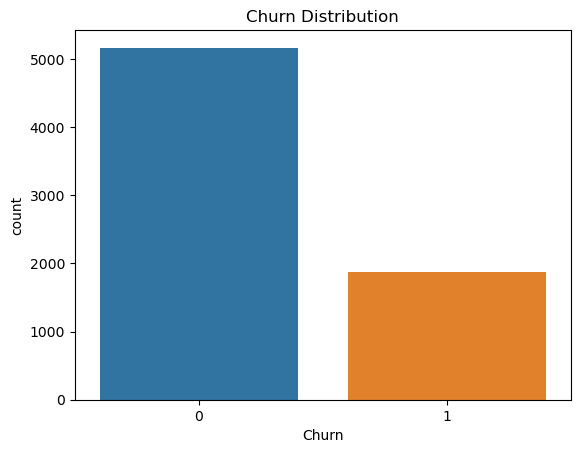

In [10]:
plt.figure()
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

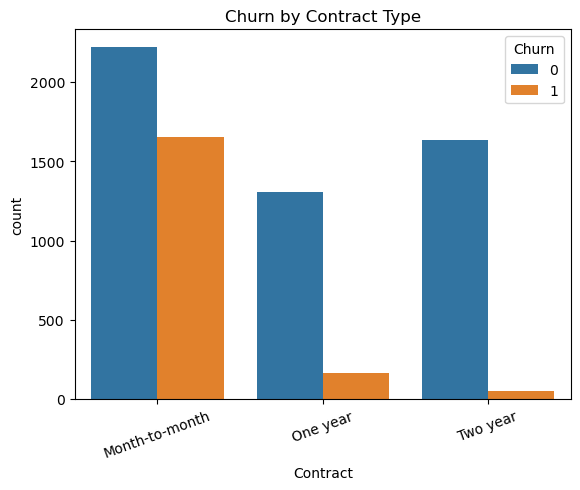

In [11]:
plt.figure()
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=20)
plt.show()

In [12]:
bins = [0, 6, 12, 24, 48, 72]
labels = ["0-6m", "6-12m", "12-24m", "24-48m", "48m+"]
df["tenure_group"] = pd.cut(df["tenure"], bins=bins, labels=labels)

tenure_churn = df.groupby("tenure_group")["Churn"].mean() * 100
print(tenure_churn)

tenure_group
0-6m      53.333333
6-12m     35.886525
12-24m    28.710938
24-48m    20.388959
48m+       9.513176
Name: Churn, dtype: float64


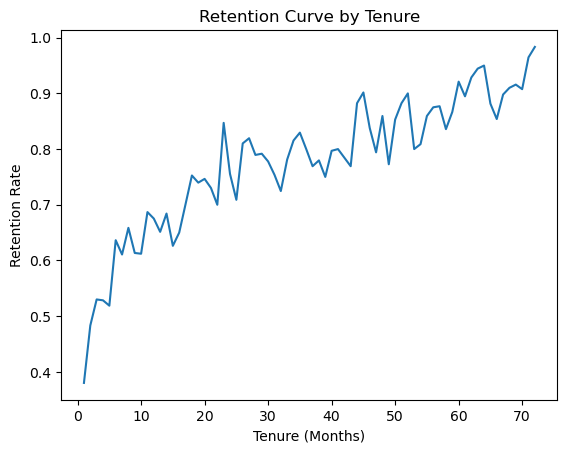

In [13]:
retention = df.groupby("tenure")["Churn"].mean()

retention_rate = 1 - retention

plt.figure()
plt.plot(retention_rate.index, retention_rate.values)
plt.title("Retention Curve by Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Retention Rate")
plt.show()


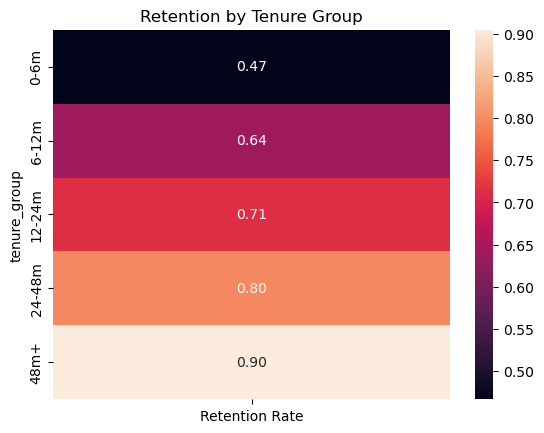

In [14]:
cohort_table = df.groupby("tenure_group")["Churn"].mean().reset_index()
cohort_table["Retention Rate"] = 1 - cohort_table["Churn"]

pivot_table = cohort_table.pivot_table(values="Retention Rate",
                                        index="tenure_group")

plt.figure()
sns.heatmap(pivot_table, annot=True, fmt=".2f")
plt.title("Retention by Tenure Group")
plt.show()

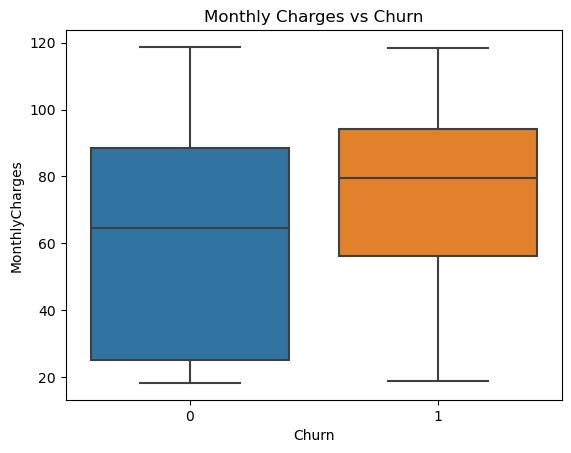

In [15]:
plt.figure()
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

In [16]:
risk_segment = df.groupby("Contract")["Churn"].mean() * 100
print("Churn Rate by Contract Type:\n")
print(risk_segment.sort_values(ascending=False))

Churn Rate by Contract Type:

Contract
Month-to-month    42.709677
One year          11.277174
Two year           2.848665
Name: Churn, dtype: float64


In [18]:
revenue_loss = df[df["Churn"] == 1]["MonthlyCharges"].sum()

print("Estimated Monthly Revenue Lost Due to Churn: ${:.2f}".format(revenue_loss))


Estimated Monthly Revenue Lost Due to Churn: $139130.85


Churn Prediction Model

To move beyond descriptive analytics, we build a Logistic Regression model to:

- Predict probability of churn
- Identify key drivers of churn
- Support proactive retention strategies

This simulates real-world predictive retention systems used in SaaS businesses.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df_model = df.copy()

df_model = df_model.drop(columns=[
    "customerID",
    "tenure_group",
    "analysis_date",
    "signup_date",
    "signup_month"
], errors="ignore")


from sklearn.preprocessing import LabelEncoder

for column in df_model.columns:
    if df_model[column].dtype == "object":
        df_model[column] = LabelEncoder().fit_transform(df_model[column])

X = df_model.drop("Churn", axis=1)
y = df_model["Churn"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.783226723525231

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



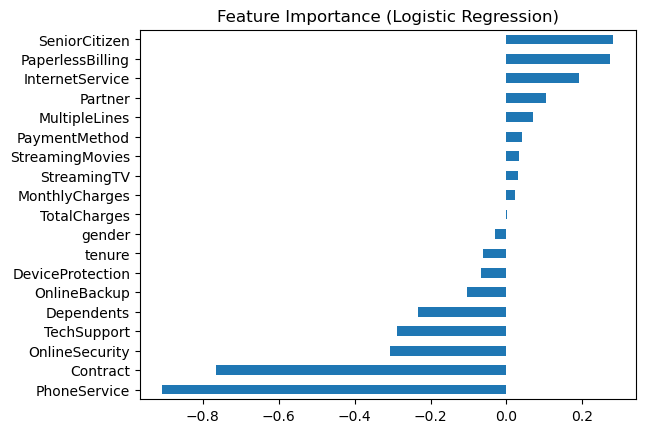

In [23]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance = importance.sort_values()

plt.figure()
importance.plot(kind="barh")
plt.title("Feature Importance (Logistic Regression)")
plt.show()


Cohort Analysis

Cohort analysis groups customers based on signup period to evaluate retention patterns over time.

This helps answer:
- Do newer customers churn faster?
- Is retention improving over time?
- How does customer lifecycle evolve?

Cohort analysis is widely used in SaaS analytics.


In [24]:
df["analysis_date"] = pd.to_datetime("2024-01-01")

df["signup_date"] = df["analysis_date"] - pd.to_timedelta(df["tenure"] * 30, unit="D")

df["signup_month"] = df["signup_date"].dt.to_period("M")


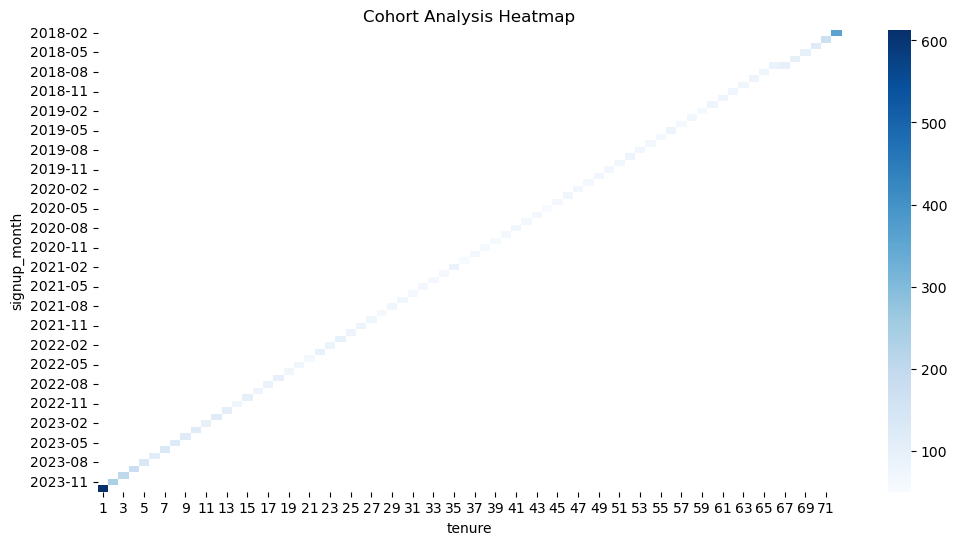

In [25]:
cohort_data = df.groupby(["signup_month", "tenure"])["Churn"].count().reset_index()

cohort_pivot = cohort_data.pivot_table(
    index="signup_month",
    columns="tenure",
    values="Churn"
)

plt.figure(figsize=(12,6))
sns.heatmap(cohort_pivot, cmap="Blues")
plt.title("Cohort Analysis Heatmap")
plt.show()

Business Recommendations

Based on the analysis:

1. Incentivize customers to shift from month-to-month to annual contracts.
2. Improve onboarding during the first 3–6 months.
3. Identify high-risk customers using churn prediction model.
4. Implement proactive retention campaigns for high-value customers.
5. Offer loyalty discounts to long-tenure customers.

These actions can reduce churn and improve lifetime value.


Conclusion

This analysis identified key drivers of churn and customer lifetime behavior.

Key findings:
- Churn is highest among month-to-month customers.
- Early lifecycle customers are most at risk.
- Contract type and tenure strongly influence churn probability.
- Churn leads to significant recurring revenue loss.

The combination of descriptive analytics, cohort analysis, and predictive modeling provides a strong foundation for data-driven retention strategies.
